In [42]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
from wrf import getvar, interplevel, to_np, get_basemap, ll_to_xy,latlon_coords,latlon_coords, smooth2d,get_cartopy, cartopy_xlim, cartopy_ylim
import pandas as pd
from netCDF4 import Dataset
import netCDF4
import h5py as h5
import csv
from scipy import stats
import seaborn as sns
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units

In [43]:
file_list = ['crsimNARRL1','crsimNARRL2','crsimNARRL3','crsimNARRL4','crsimNARRL5','crsimNARRL6','crsimNARRL7','crsimNARRL8','crsimNARRL9','crsimNARRL10']
low_list = [33,47,61,31,30,32,33,31,31,93]
high_list = [126,135,128,132,127,137,127,136,128,93]

In [44]:
ct = 0
Y = 71
x = 0
total_heights = []
total_temp = []
for name in file_list:
    filename = name
    ncfile2 = Dataset(filename)
    reflectivity = ncfile2['Zhh'][:].squeeze()
    height = ncfile2['height'][:].squeeze()
    temp = ncfile2['temp'][:].squeeze()
    x = low_list[ct]
    print(filename)
    
    while x < high_list[ct] + 1:
        
        z = 0
        ref_height = 0
        continue_flag = True
        hit = False
        looking_flag = False
        looking_up = 0
        #Loop through each Z index in each point along the FT
        while z < 80 and continue_flag == True:
            ref_ref = reflectivity[z,Y,x]
            hit = False
            if ref_ref >= -30:
                ref_height = height[z,Y,x]
                ref_temp = temp[z,Y,x]
                hit == True
            
            if hit == True:
                looking_up = 0
                looking_flag = True
                continue_flag = True
                
            if looking_flag == True:
                looking_up = looking_up + 1
            
            if looking_up == 25:
                continue_flag == False

            z = z + 1
        if ref_height > 0:
            total_heights.append(ref_height)
            total_temp.append(ref_temp)
        
        
        
        x = x + 1
    ct = ct + 1
        
        
        
        

crsimNARRL1
crsimNARRL2
crsimNARRL3
crsimNARRL4
crsimNARRL5
crsimNARRL6
crsimNARRL7
crsimNARRL8
crsimNARRL9
crsimNARRL10


In [5]:
print(np.mean(total_heights))

4322.977


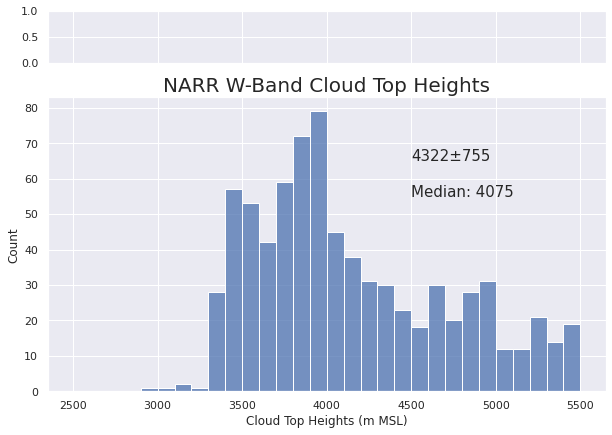

In [46]:
sns.set(style="darkgrid")
df = np.array(total_heights)
fig, (ax_box, ax_hist) = plt.subplots(2, figsize = (10,7),sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
#sns.boxplot(df, ax=ax_box)
sns.histplot(data=df, ax=ax_hist,binwidth = 100, binrange = [2500,5500])
ax_hist.set(xlabel='Cloud Top Heights (m MSL)')
plt.title("NARR W-Band Cloud Top Heights", fontsize = 20)
plt.text(4500, 65, str(np.mean(total_heights))[0:4] +"±"+str(np.std(total_heights))[0:3], fontsize = 15)
plt.text(4500, 55, "Median: " +str(np.median(total_heights))[0:4], fontsize = 15)
fig.savefig("NARR_WBAND_CT.png")

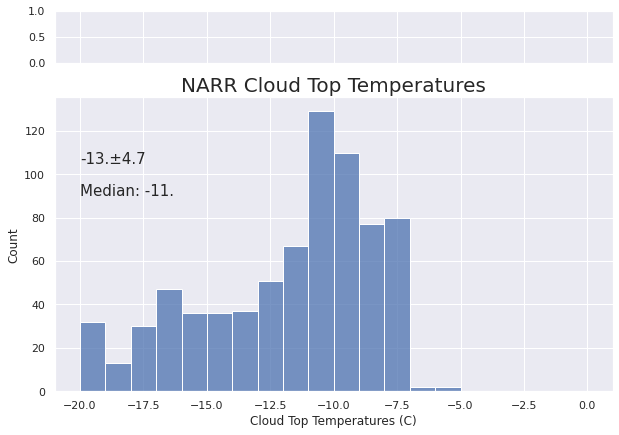

In [50]:
sns.set(style="darkgrid")
df = np.array(total_temp)
fig, (ax_box, ax_hist) = plt.subplots(2, figsize = (10,7),sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
#sns.boxplot(df, ax=ax_box)
sns.histplot(data=df, ax=ax_hist,binwidth = 1, binrange = [-20,0])
ax_hist.set(xlabel='Cloud Top Temperatures (C)')
plt.title("NARR Cloud Top Temperatures", fontsize = 20)
#plt.text(4700, 140, str(np.mean(total_heights))[0:4] +"±"+str(np.std(total_heights))[0:3], fontsize = 15)
#plt.text(4700, 130, "Median: " +str(np.median(total_heights))[0:4], fontsize = 15)
plt.text(-20, 105, str(np.mean(total_temp))[0:4] +"±"+str(np.std(total_temp))[0:3], fontsize = 15)
plt.text(-20, 90, "Median: " +str(np.median(total_temp))[0:4], fontsize = 15)
fig.savefig("NARR_WBAND_CT_TEMP.png")

In [ ]:
   #Loop through each point along the FT
    while x < high_list[ct]+1:
        z = 0
        ref_height = 0
        
        #Loop through each Z index in each point along the FT
        while z < 80:
            ref_ref = reflectivity[z,Y,x]
            
            if ref_ref >= -30:
                ref_height = height[z,Y,x]
                ref_temp = temp[z,Y,x]

            z = z + 1
        if ref_height > 0:
            total_heights.append(ref_height)
            total_temp.append(ref_temp)

        x = x + 1
    x = low_list[ct]

    Y = 72
    #Loop through each point along the FT
    while x < high_list[ct]+1:
        z = 0
        ref_height = 0
        
        #Loop through each Z index in each point along the FT
        while z < 80:
            ref_ref = reflectivity[z,Y,x]
            
            if ref_ref >= -30:
                ref_height = height[z,Y,x]
                ref_temp = temp[z,Y,x]

            z = z + 1
        if ref_height > 0:
            total_heights.append(ref_height)
            total_temp.append(ref_temp)
        x = x + 1
    x = low_list[ct]

    Y = 70
    #Loop through each point along the FT
    while x < high_list[ct]+1:
        z = 0
        ref_height = 0
        
        #Loop through each Z index in each point along the FT
        while z < 80:
            ref_ref = reflectivity[z,Y,x]
            
            if ref_ref >= -30:
                ref_height = height[z,Y,x]
                ref_temp = temp[z,Y,x]

            z = z + 1
        if ref_height > 0:
            total_heights.append(ref_height)
            total_temp.append(ref_temp)
        x = x + 1